# It's Day 1 of the workshop and I know some things!

Welcome to day 1 of the bootcamp! Now that we've covered the basics, we can start diving into what makes programming useful and powerful. To begin, let's quickly review what we learned in the pre-workshop. *Note: You'll need to run all code cells of this tutorial in order.*

### Variable Declarations
We learned that to store information (of any kind) in Python, we want to set a variable name equal to that information, and then use that name to perform calculations on it.

### Data Types
We learned that Python has different rules for different kinds of data — it performs calculations differently on integers than on floats, treats lists differently than numpy arrays, etc. Figuring out what data type is the most efficient and effective way to work with your data is one of the key conceptual skills to learn when programming. 

### Lists and Indexing
We learned that the "default" way to store simple data (say, a bunch of numbers) is in a **list**, which can then be **indexed** by element number (starting with zero) to extract values from the list. We learned that lists can be fed into certain functions, like sum(), to return the sum of all numbers in the list (assuming the list is, indeed, all numbers). 

### Debugging (barely)
You probably didn't notice, but we practiced a little bit of debugging as well — we printed out lists to make sure they were filled with the numbers we wanted after a calculation, a simple form of debugging! 

## What we will cover here
By the end of this tutorial, I hope you will be able to handle the first task a professor might give you when starting to do research with them — loading up some data from a simple ASCII file, performing some calculations, and plotting it. To do all this, we will need to learn a bit of the Numpy and **Pandas** Libraries, some **conditional statements** and **loops**, and some new plotting techniques. We will also introduce the concept of **functions** here that is important for advanced Python programming. Without further ado, let's jump in! 

### Numpy, Scipy, Matplotlib, and Beyond
In the pre-workshop tutorial, we had to resort to calling a special data type that was not native to Python — the Numpy Array. This was useful to us because of a special behavior: Operating math on an array performs the operation on each value in the array, useful for say, subtracting the mean from every value and then squaring every value. 

But what *is* Numpy, actually? 

Believe it or not, from a mathematical perspective, what you saw in the previous tutorial was just about the limit of Python's native math functionality. You can add, subtract, multiply, exponentiate, and take modulos. To do anything more complicated — like, say, calculate a sine or cosine, we need to actually **import** libraries of functions which can accomplish these tasks. 

#### What's a function? 
It's useful to take a second to make sure we're on the same page about functions. A function is something that takes one or more inputs, and spits something out. When, in math class, you write y = sin(x), "sin" is the function you are using. The "x" you are plugging in is the *argument* of that function, and you are storing its *output* in the variable "y". If I use the range() function, to create a list from 1 to 10, 

In [7]:
y = range(1, 11)
print(y)

range(1, 11)


Then "1" and "11" are arguments to the range function, and it's output is stored in "y". Note that print() is also a function — it takes in the argument "y" and spits out its value onto the screen. 

Back to the task at hand. If I want to calculate the sine of a number, $x$, I can't do that in native Python. But luckily, many clever people have crafted libraries of functions which can. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Okay, so to use these libraries of functions, I have to **import** them into my code, as I have above. Notice that I could just "import numpy" as well — but Python lets you give the library a "nickname" shorthand so that in your code, you don't have to type out "numpy" every time. In other libraries, you can choose whatever you want, but generally, numpy is imported as np and matplotlib.pyplot (a subset of matplotlib with the plotting commands we'll be using) as plt. Don't worry about the "inline" — it's just required to make plots appear in this notebook rather than a separate window.

Now, I can create my sine:

In [9]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

Woah! New function alert! I also just used np.linspace(), a function which, unlike range (which has you pick a start and stop and advances by integer (or multiples) steps in between),  lets you pick a start, a stop, and a number of subdivisions, and then will try to space them evenly. Read it as "give me an array from 0 to 10 with 100 evenly spaced points." Read line two as "Give me an array that contains the sine of each value in the x array." 

Now let's whip out our plotting:

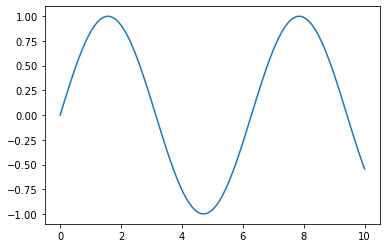

In [10]:
plt.plot(x,y)

The above is the absolute barebones you can plot: $x$ against $y$. We've used fancier plotting techniques before and will get into them a bit later. 

## Loading Data from a File
It is day 1 of your new research assignment. You've just met with the professor or post-doc. They've probably given you like 10,000 papers to read (skim). They might also have given you a file or two of data, and told you to "familiarize" yourself with the format, get it into Python, and make some plots. 

This is what we are going to learn to do now.

### Loadtxt() and Genfromtxt()
Astronomical data are stored in a huge variety of file formats and organizational schemes. Let's start with the most simple and build up. In Ye Olde Days, basically all data were kept in plaintext ASCII files — in short, text. Things have changed recently, though often times data tables are still the most efficient means of storage, they are now wrapped inside file formats like FITS and HDF5 to make them more portable and stable over time. At the end of the day, we are most interested in getting past those layers of protocols to the raw numbers underneath, which we want sitting around in arrays we can mess with. 

We started with the most simple of cases in the previous tutorial: The ASCII text file. We will be going over FITS files on day 2 the workshop, but for now let's stick to text files. You should have access to the "cumulative_2022.06.13_17.10.09.csv" file in the "pasea-arp/Day_1" folder on your Google Drive (you uploaded the "pasea-arp" GitHub repository to your Drive in the pre-workshop tutorial). This file contains Kepler data that we will investigate to understand exoplanets!

Your first task: use the cell below to load the data using Numpy's loadtxt() function into a variable called "kepler".

The file you are loading contains several "ID" and "name" columns, the first is the Kepler ID, the second is the Kepler object of interest (KOI) name, and the third is the Kepler name. So, make sure you use the right "dtype" option as you did in the last tutorial.

In [11]:
# Your code here (remember to mount the Google Drive)
from google.colab import drive
drive.mount('/content/drive')

kepler_array = np.loadtxt('drive/My Drive/pasea-arp/Day_1/cumulative_2022.06.13_17.10.09.csv',
                          delimiter=',', dtype='str')

In the cell below, once you get it to load without throwing an error, print the array to see what it looks like. 

In [12]:
kepler_array

array([['kepid', 'kepoi_name', 'kepler_name', ..., 'koi_dikco_mdec_err',
        'koi_dikco_msky', 'koi_dikco_msky_err'],
       ['10797460', 'K00752.01', 'Kepler-227 b', ..., '0.1700', '0.3200',
        '0.1600'],
       ['10797460', 'K00752.02', 'Kepler-227 c', ..., '0.7300', '0.5000',
        '0.4500'],
       ...,
       ['10147276', 'K07987.01', '', ..., '0.2600', '5.1600', '0.2200'],
       ['10155286', 'K07988.01', '', ..., '0.6600', '2.0000', '0.4600'],
       ['10156110', 'K07989.01', '', ..., '1.1000', '3.5000', '1.1000']],
      dtype='<U210')

Notice how none of the lines starting with a "#" in the "cumulative_2022.04.26_22.11.54.csv" file are present in "kepler_array". This is because np.loadtxt() removes any "#" lines by default as they represent comments. You can explicitly specify what symbol represents comments using the "comments" keyword.

There are other ways to load text files. You can use the "np.genfromtxt()" function that is slightly more powerful than np.loadtxt(). You can look up the documentation of np.genfromtxt() to see this for yourself. There is also the **pandas** library for data analysis and manipulation that I recommend you use for loading csv files! Let's import this library

In [13]:
import pandas as pd

Now, we can read the kepler file using the "pd.read_csv()" function as follows:

In [14]:
kepler_df = pd.read_csv('drive/My Drive/pasea-arp/Day_1/cumulative_2022.06.13_17.10.09.csv', comment="#")

Now print "kepler_df"

In [15]:
kepler_df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,0,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,10155286,K07988.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.092,0,0,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


That looks like a table! You have 9564 rows × 48 columns. The rows are indexed from 0 to 9563 and the columns are indexed by their names.

Let's check the datatype of "kepler_df"

In [16]:
# Your code here
type(kepler_df)

pandas.core.frame.DataFrame

We get what is called a pandas "DataFrame". 

You can index a column in a DataFrame using its name (similar to how you did indexing with dictionaries)

In [17]:
kepler_df['kepid']

0       10797460
1       10797460
2       10811496
3       10848459
4       10854555
          ...   
9559    10090151
9560    10128825
9561    10147276
9562    10155286
9563    10156110
Name: kepid, Length: 9564, dtype: int64

You see that the data type of all the values in this column is "int64". Thus, pd.csv() was able to interpret the data type. 

To index the 2nd row of the DataFrame, you use the following code

In [18]:
kepler_df.loc[2]

kepid                  10811496
kepoi_name            K00753.01
kepler_name                 NaN
koi_disposition       CANDIDATE
koi_vet_stat               Done
                        ...    
koi_dikco_mra_err         0.071
koi_dikco_mdec           -0.027
koi_dikco_mdec_err        0.074
koi_dikco_msky            0.027
koi_dikco_msky_err        0.074
Name: 2, Length: 140, dtype: object

Here we see a few entries that say **NaN**. pd.csv() automatically converts all missing values to "NaN", which stands for not a number. It is a numeric data type that represents undefined values (e.g., 0/0). Let's explicitly check the data type of one such value

In [19]:
type(kepler_df.loc[2]['kepler_name'])

float

The value is numeric! This is good because we can apply numeric operations to numeric arrays despite having missing (NaN) values. More on this will be covered later in the workshop.

Now let's acess the same row as above using the "kepler_array" ndarray

In [20]:
# Row 3 because the header forms Row 0
kepler_array[3]

array(['10811496', 'K00753.01', '', 'CANDIDATE', 'Done', '2018-08-16',
       'CANDIDATE', '0.0000', '0', '0', '0', '0', 'q1_q17_dr25_sup_koi',
       'DEEP_V_SHAPED', '19.899139950', '1.4940000e-05', '-1.4940000e-05',
       '175.8502520', '5.810000e-04', '-5.810000e-04', '2455008.850',
       '5.810000e-04', '-5.810000e-04', '0', '', '', '', '', '', '0.9690',
       '5.1260', '-0.0770', '1.78220', '0.03410', '-0.03410', '', '', '',
       '1.0829e+04', '1.710e+02', '-1.710e+02', '0.154046',
       '5.034292e+00', '-4.217900e-02', '7.29555', '35.03293', '-2.75453',
       'LS+MCMC', '14.60', '3.920e+00', '-1.310e+00', '0.1419', '', '',
       '88.96', '', '', '638.0', '', '', '39.30', '31.04', '-10.49',
       '53.500000', '25.700000', '-25.700000',
       'Claret (2011 A&A 529 75) ATLAS LS', '0.0000', '0.0000', '0.2711',
       '0.3858', 'q1_q17_dr25_koi', '37.1597670', '187.4491000', '76.30',
       '1', '56', '1', 'q1_q17_dr25_tce',
       '11111101110111011000000000000000', '0.662

You see that the same entries that are marked "NaN" in the DataFrame are empty strings ('') in the ndarray.

So now we are starting to see a methodology for extracting the numbers out of the strings. Our next step is going to be searching for multiple observations of a Kepler target (a star) in the Kepler data and analyzing them to understand the target and its exoplanets. We are going to take a detailed look into pandas DataFrames and **for-loops**.

For indexing all observations of a particular target, we can use "kepid" as the index. This is shown below

In [21]:
kepler_df = kepler_df.set_index('kepid')

In [22]:
kepler_df

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,1,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
10128825,K07986.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.497,0,0,0,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
10147276,K07987.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.021,0,0,1,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220


We can now index using the first Kepler ID in the list.

In [23]:
kepler_10872983 = kepler_df.loc[10872983]

In [24]:
kepler_10872983

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
kepid,,,,,,,,,,,,,,,,,,,,,
10872983,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,-0.07,0.11,0.08,0.13,-0.02,0.13,-0.08,0.10,0.08,0.10
10872983,K00756.02,Kepler-228 c,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,0.09,0.16,0.26,0.16,0.18,0.15,0.06,0.15,0.19,0.17
10872983,K00756.03,Kepler-228 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0.992,0,0,0,...,-0.30,0.21,0.45,0.28,-0.41,0.33,-0.29,0.21,0.50,0.30


Pandas DataFrames have a "describe" function that computes summary (descriptive) statistics as follows:

In [25]:
kepler_df.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
count,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,...,8965.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000
mean,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,...,-0.045420,0.446229,1.866561,0.489930,-0.024244,0.425337,-0.076749,0.436684,1.812566,0.476060
std,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,...,2.573558,0.569933,2.988742,0.646403,2.382286,0.602150,2.553758,0.567535,2.986376,0.647587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,...,-75.900000,0.067000,0.000000,0.067000,-27.800000,0.067000,-76.600000,0.067000,0.000000,0.067000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,...,-0.387000,0.098000,0.170000,0.100000,-0.310000,0.087000,-0.390000,0.090000,0.210000,0.094000
50%,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,...,0.000000,0.280000,0.610000,0.310000,-0.004000,0.250000,-0.017000,0.270000,0.583000,0.290000
75%,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,0.010500,...,0.300000,0.610000,2.160000,0.680000,0.290000,0.590000,0.300000,0.600000,1.970000,0.660000
max,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,0.569000,...,27.500000,22.000000,88.600000,32.000000,46.570000,33.000000,34.000000,22.000000,89.600000,32.000000


### For-Loops
There are two primary looping methods in Python: For-loops and While-loops. We'll focus on For-loops for a second. 

A For-loop allows you to specify what's known as an iterator — usually an increasing array of indices — which let's you run a block of code over and over again under slightly different circumstances. For example, what if we wanted to advance through the observations of the Kepler target: 10797460 array, and on a new line each time, print the name of the exoplanet detection. I could do that with the following:

In [26]:
for i in kepler_10872983['kepler_name']:
    print(i)


Kepler-228 d
Kepler-228 c
Kepler-228 b


OK, so what just happened? By saying `For ind in kepler_10797460['kepler_name']` I was telling the computer that `kepler_10797460['kepler_name']` was a container with multiple "things" in it (the entries we saw above). I told it "Hey, for every *thing* in `kepler_10797460['kepler_name']`, print out that *thing*."

Notice that this worked because I, the programmer, knew that `kepler_10797460['kepler_name']` was something that could be advanced through. 

Let's see another example. Remember the range() function? I can use that as a iterator as well:

In [27]:
for i in range(10):
    print('I am analyzing data unit: {}'.format(i))

I am analyzing data unit: 0
I am analyzing data unit: 1
I am analyzing data unit: 2
I am analyzing data unit: 3
I am analyzing data unit: 4
I am analyzing data unit: 5
I am analyzing data unit: 6
I am analyzing data unit: 7
I am analyzing data unit: 8
I am analyzing data unit: 9


Remember, range(10) can be treated as [0,1,2,3,4,5,6,7,8,9]. You could, to see it more clearly, say:

In [28]:
thing_to_loop_over = range(10)
for thing in thing_to_loop_over:
    print('I am analyzing data unit: {}'.format(thing))

I am analyzing data unit: 0
I am analyzing data unit: 1
I am analyzing data unit: 2
I am analyzing data unit: 3
I am analyzing data unit: 4
I am analyzing data unit: 5
I am analyzing data unit: 6
I am analyzing data unit: 7
I am analyzing data unit: 8
I am analyzing data unit: 9


I'm also highlighting here that while "i" is a standard choice for an outer loop iterating variable name (followed by "j" and "k"), you can use whatever you want as long as it's consistent in the loop. 

I can also use loops to fill an empty array with values, e.g.

In [29]:
to_fill = []
for i in kepler_10872983['kepler_name']: #check the length of class_grades, and create a counting array that long
    to_fill.append(i[-1])
print(to_fill)

['d', 'c', 'b']


What I've done here is make a list containing all the scores, as floats! For each item in class grades, I first take the 1st element (the i[1] part), then I force it to be a float (this wouldn't work if they weren't numbers in the strings), then I **appended** that value to the empty to_fill array outside. Appending to lists is easy, as shown, as a *method* of lists. So to add anything to the end of a list, you just write list_name.append(thing_to_add). 

### Exercise 1: A dictionary of Kepler IDs / exoplanets
OK, it's time for you to dive in! Once you've gotten the hang of the above, and maybe played around a bit with it, try the following. 

In the cell block below, define an empty dictionary called "kepler_planets". Then, initialize a for-loop that goes through the "kepler_array" ndarray, and puts each Kepler ID (as a string or an integer) as a key, and the total number of confirmed exoplanets revolving it (as a float) as a value. 

You can set new values in a dictionary even easier than appending, simply use 

dictionary_name['new key'] = new value

Hint: The 'koi_disposition' column tells us whether an exoplanet is 'CONFIRMED', a 'CANDIDATE', or a 'FALSE POSITIVE', and the 'kepler_name' column mentions the name of confirmed exoplanets.

*Note: Here all our keys are strings, and this is often the use-case for dictionaries, but it is not required. You can make dictionaries whose keys are, for example, integers. 

In [30]:
kepler_planets = {}

# Skip the header row (column names)
kepler_arr_dat = kepler_array[1:]

# Choose all the planets with `koi_disposition = CONFIRMED`
kepler_arr_dat_conf = kepler_arr_dat[kepler_arr_dat[:, 3] == 'CONFIRMED']

# Your code here
# Find all the unique Kepler IDs
unique_ids = np.unique(kepler_arr_dat_conf[:, 0])

for index in unique_ids:
    # Find the rows that have the unique Kepler ID: `index`
    id_list_ind = np.where(kepler_arr_dat_conf[:, 0] == index)
    id_list = kepler_arr_dat_conf[id_list_ind]

    # Sum the confirmed exoplanets
    kepler_planets[index] = len(id_list)

Did it work? Try indexing for the Kepler ID '10872983' in the cell below:

In [31]:
kepler_planets['10872983']

3

Did you get 3? Or are you struggling to create the dictionary?

Do not worry if you weren't able to write the above code. The reason I asked you to try writing it is to show that it is not straightforward to perform the above opertaion using Numpy (nd)array, but relatively easy using Pandas DataFrame! Try the following code:

In [32]:
# Group entries in `kepler_df` by `kepid`
kepler_df_groups = kepler_df.groupby('kepid')

# Find the number of unique names of confirmed exoplanets
kepler_planets = kepler_df_groups['kepler_name'].nunique()

# Print examples
print(kepler_planets[10872983], kepler_planets[10797460], kepler_planets[10854555], kepler_planets[10811496])

3 2 1 0


In [33]:
type(kepler_planets)

pandas.core.series.Series

Here "kepler_planets" is indexed by an integer that represents the Kepler ID (rather than a string). Its datatype is "pandas.core.series.Series", which works similar to a dictionary. You can convert the Series to a dictionary using `kepler_planets.to_dict()`

To see if the new "kepler_planets" Series is doing the right thing, index "kepler_df" for the Kepler IDs '10872983' and '10811496':

In [34]:
# Your code here
kepler_df.loc[10872983]

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
kepid,,,,,,,,,,,,,,,,,,,,,
10872983,K00756.01,Kepler-228 d,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,-0.07,0.11,0.08,0.13,-0.02,0.13,-0.08,0.10,0.08,0.10
10872983,K00756.02,Kepler-228 c,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,0.09,0.16,0.26,0.16,0.18,0.15,0.06,0.15,0.19,0.17
10872983,K00756.03,Kepler-228 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0.992,0,0,0,...,-0.30,0.21,0.45,0.28,-0.41,0.33,-0.29,0.21,0.50,0.30


In [35]:
# Your code here
kepler_df.loc[10811496]

kepoi_name             K00753.01
kepler_name                  NaN
koi_disposition        CANDIDATE
koi_vet_stat                Done
koi_vet_date          2018-08-16
                         ...    
koi_dikco_mra_err          0.071
koi_dikco_mdec            -0.027
koi_dikco_mdec_err         0.074
koi_dikco_msky             0.027
koi_dikco_msky_err         0.074
Name: 10811496, Length: 139, dtype: object

Looks like "kepler_planets" contains the right information! 

Now let's find the Kepler ID with the most number of confirmed exoplanets.

In [36]:
kepler_planets.max()

7

In [37]:
kepler_df.loc[kepler_planets.idxmax()]

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
kepid,,,,,,,,,,,,,,,,,,,,,
11442793,K00351.01,Kepler-90 h,CONFIRMED,Done,2018-08-16,CANDIDATE,0.000,0,0,0,...,-0.078,0.078,0.093,0.077,-0.011,0.075,-0.13,0.095,0.13,0.095
11442793,K00351.02,Kepler-90 g,CONFIRMED,Done,2018-08-16,CANDIDATE,0.880,0,0,0,...,-0.090,0.170,0.120,0.140,-0.071,0.078,-0.18,0.160,0.19,0.150
11442793,K00351.03,Kepler-90 d,CONFIRMED,Done,2018-08-16,CANDIDATE,0.999,0,0,0,...,0.350,0.340,0.400,0.310,0.210,0.190,0.26,0.350,0.34,0.300
11442793,K00351.05,Kepler-90 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.999,0,0,0,...,0.510,0.580,0.510,0.550,0.060,0.310,0.43,0.450,0.43,0.450
11442793,K00351.06,Kepler-90 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0.916,0,0,0,...,-0.440,0.390,0.570,0.440,0.380,0.350,-0.54,0.370,0.66,0.420
11442793,K00351.04,Kepler-90 e,CONFIRMED,Done,2018-08-16,CANDIDATE,0.971,0,0,0,...,-1.160,0.430,1.280,0.450,0.570,0.320,-1.23,0.420,1.35,0.430
11442793,K00351.07,Kepler-90 f,CONFIRMED,Done,2018-08-16,CANDIDATE,0.995,0,0,0,...,-0.010,0.540,0.240,0.710,-0.240,0.720,-0.04,0.580,0.25,0.720


We can also find the mean number of exoplanets.

In [38]:
kepler_planets.mean()

0.32505478451424397

Looks like the mean is 0.32. How do we know if a Kepler ID has more or less (than the mean) confirmed exoplanets? That's, naturally, where conditional "if-statements" come in. 

## If Statements and other Conditionals
The problem I've posed, of figuring out whether a condition is true or not, is addressed in code via conditional statements. They run, logically, along the lines of "IF something is TRUE, do THIS, IF something ELSE is TRUE, do THAT, OTHERWISE do SOMETHING ELSE." 

Here's an example:

Text(0.5, 1.0, 'Confirmed Planets')

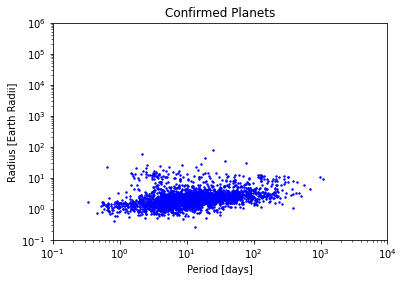

In [401]:
fig, ax = plt.subplots(1, 1)

for ind, row in kepler_df.iterrows():
    if row['koi_disposition'] == 'CONFIRMED':
        ax.scatter(row['koi_period'], row['koi_prad'], color='blue', s=2)

# We will go over the plotting details later
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**(-1), 10**(4))
ax.set_ylim(10**(-1), 10**(6))
ax.set_xlabel('Period [days]')
ax.set_ylabel('Radius [Earth Radii]')
ax.set_title('Confirmed Planets')

We can also link several if-statements using elif statements, which are combinations of else and if:

Text(0.5, 1.0, 'Candidate + Confirmed Planets')

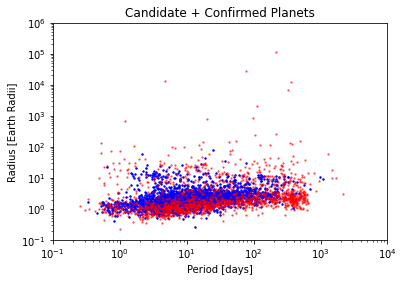

In [402]:
fig, ax = plt.subplots(1, 1)

for ind, row in kepler_df.iterrows():
    if row['koi_disposition'] == 'CANDIDATE':
        ax.scatter(row['koi_period'], row['koi_prad'], color='red', s=2, alpha=0.5)
    elif row['koi_disposition'] == 'CONFIRMED':
        ax.scatter(row['koi_period'], row['koi_prad'], color='blue', s=2)
    else:
        pass

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(10**(-1), 10**(4))
ax.set_ylim(10**(-1), 10**(6))
ax.set_xlabel('Period [days]')
ax.set_ylabel('Radius [Earth Radii]')
ax.set_title('Candidate + Confirmed Planets')

What happened here? We said "IF the Kepler object of interest is a planet CANDIDATE, plot its radius vs period in red, ELSE, IF it is a CONFIRMED planet, plot its radius vs period in blue, ELSE do nothing (`pass`)". If the first condition is met, the elif (or else) is not triggered. Thus, by mixing together if's, else's, and elif's, you can check conditions you are interested in.

Notice that the above looks very similar to [this pre-generated plot](https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/exokepler_all_radperiod.png) on the NASA Exoplanet Archive! You are on your way to making publication-quality plots.

Let's look at a simple example to better understand conditionals:

In [352]:
person_name = 'Finnaeus Fthrockbottom'
if len(person_name) < 10:
    print('This is a short name')
else: 
    print('This is a long name')

This is a long name


In [353]:
if ('F' in person_name) and ('n' in person_name):
    print('Both present')

if ('F' in person_name) or ('n' in person_name):
    print('One is present')

if ('l' not in person_name) and ('y' not in person_name):
    print('Neither present')

if ('l' not in person_name) or ('F' not in person_name):
    print('One is not present')

Both present
One is present
Neither present
One is not present


Take a moment parsing the above, seeing how you can string together conditionals. You can ask if things are in, or not in, other things, or you can compare values by asking if things are equal (==), not equal (!=), or greater than/less than (>, <). 

### Exercise: Sort the entries
Below, sort the indices (Kepler IDs) of the "kepler_df" DataFrame. You can google how to do that!

In [358]:
# Your code here
kepler_df.sort_index()

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
kepid,,,,,,,,,,,,,,,,,,,,,
757450,K00889.01,Kepler-75 b,CONFIRMED,Done,2018-08-16,CANDIDATE,0.999,0,0,0,...,0.071,0.070,0.071,0.069,0.083,0.072,-0.097,0.078,0.127,0.076
892772,K01009.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,0,1,...,-1.340,0.130,4.920,0.160,-4.950,0.150,-1.580,0.120,5.190,0.160
1025986,K07621.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,0,...,-2.500,2.500,3.800,1.900,2.780,0.540,-2.500,2.600,3.700,2.000
1026032,K06252.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,0,...,0.051,0.067,0.079,0.067,0.005,0.074,-0.059,0.077,0.060,0.077
1026957,K00958.01,Kepler-1731 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,0.140,0.150,0.150,0.140,-0.080,0.120,-0.290,0.160,0.300,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12834874,K00487.01,Kepler-574 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,...,-0.010,0.120,0.220,0.150,0.160,0.150,0.040,0.130,0.170,0.160
12835139,K05981.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,NaN,1,0,0,...,-1.600,4.500,2.100,3.900,1.300,1.900,-1.400,2.800,1.900,2.200
12885212,K02184.02,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.638,0,0,0,...,0.540,0.650,0.610,0.800,-0.140,0.820,0.810,0.630,0.830,0.630


Try the same with the "kepler_array" ndarray.

Hint: Remember to typecast Kepler ID to integers.

In [392]:
# Your code here
np.sort(kepler_array[1:, 0].astype(int))

array([  757450,   892772,  1025986, ..., 12885212, 12885212, 12935144])

So we've now seen how to get data from a text file into Python, where we can start interrogating it, and performing analysis and calculations with it. For a look at how to pull in data from more complicated systems, like FITS, check out the next tutorial.

Now, the other thing Python is great for is powerful visualizations. We saw in the pre-workshop tutorial how we could plot the histogram of scores and get an idea of where one standard deviation on either side of the mean was. We also plotted the Radius - Period distribution of Kepler planets above. Now we are going to do a bit more plotting with the Kepler dataset.

### Plotting a histogram
Let's jump back, to start, with that histogram from pre-workshop, and see line by line how to make it. Don't feel discouraged if plotting commands seem like a whole new language over Python — they kind of are. It takes a lot of practice and experience to build up familiarity with what commands make plots look certain ways. For now, googling "how to add <insert> to a plot" is fine. 

The simplest kind of plot possible is plt.plot(), as for the sine wave we plotted above. But that doesn't really help us with 1D data, e.g., looking at the periods of all the Kepler exoplanets). We need to extend into a new dimension to plot anything, which is why seeing how many planets have a particular period is an interesting metric. That's a histogram. Matplotlib has a built in function to plot these. We can start by specifying nothing but the values to histogram (`kepler_df['koi_period']`):

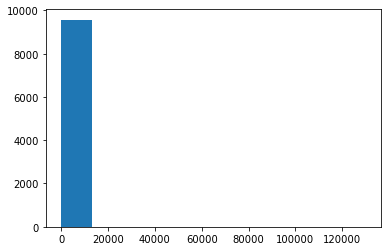

In [46]:
plt.hist(kepler_df['koi_period'])
plt.show()

The above plot doesn't look very useful. That is because the x-axis (period) range is too large (from 0 to 120,000 days!). Let's choose a smaller range that is more realistic using the "range" parameter.

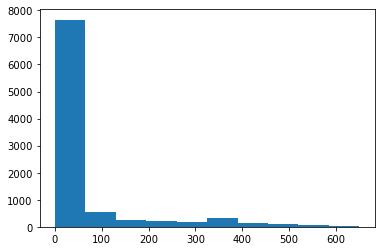

In [47]:
plt.hist(kepler_df['koi_period'], range=[0, 650])
plt.show()

That looks better, but the y-axis value (frequency or number of planets) of each bin is either too high or too low. Let's use a logarithmic scale for it:

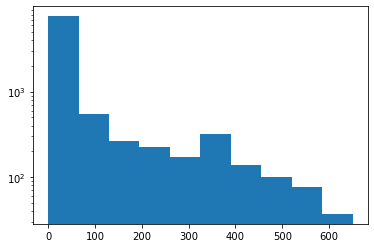

In [90]:
plt.hist(kepler_df['koi_period'], range=[0, 650])
plt.yscale('log')
plt.show()

That looks good!

By default, matplotlib picks a color, and creates ticks and labels as shown. What if I want the blue to actually be red? And semi transparent? We can do that:

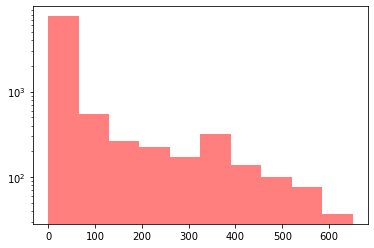

In [48]:
plt.hist(kepler_df['koi_period'], range=[0, 650], color='r', alpha=0.5)
plt.yscale('log')
plt.show()

It's hard to see because there's nothing behind it, but we now have a semi-transparent red plot. Now, looking, we have by default created 10 bins. We can create more or less:

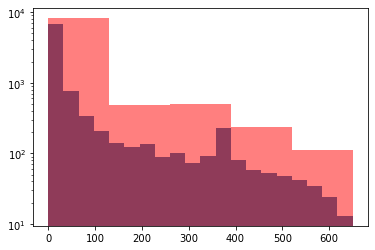

In [58]:
plt.hist(kepler_df['koi_period'], bins=20, range=[0, 650])
plt.hist(kepler_df['koi_period'], bins=5, range=[0, 650], color='r', alpha=0.5)
plt.yscale('log')
plt.show()

We can see that by decreasing the number of bins, more items (kepler ) appear in each bin. By increasing the number of bins, the opposite effect occurs. Often, we want to normalize histograms:

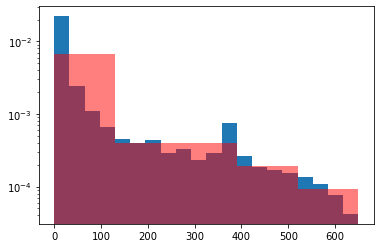

In [59]:
plt.hist(kepler_df['koi_period'], bins=20, range=[0, 650], density=True)
plt.hist(kepler_df['koi_period'], bins=5, range=[0, 650], color='r', alpha=0.5, density=True)
plt.yscale('log')
plt.show()

By normalizing, we can see the distributions overlaid on each other. It seems to me like the default of 10 was a decent number of bins. Let's try 9, un-normalize, and then add some labels:  

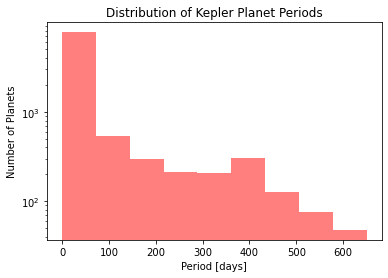

In [62]:
plt.hist(kepler_df['koi_period'], bins=9, range=[0, 650], color='r', alpha=0.5)
plt.yscale('log')
plt.xlabel('Period [days]')
plt.ylabel('Number of Planets')
plt.title('Distribution of Kepler Planet Periods')
plt.show()

Often we are interested in knowing the percentiles of a distribution — the standard in statistics is the 16th, 50th, and 84th percentile. You can calculate these easily with `np.percentile(array_like, #)`, where # is the percentile you want to calculate. 

I'll tell you that the function `plt.axvline(value, ls='--', color='k')` will plot a vertical black dashed line at a certain x-axis value "value". In the block below, reproduce the plot in the cell above, but with the standard percentile spots demarcated by vertical dashed lines. 

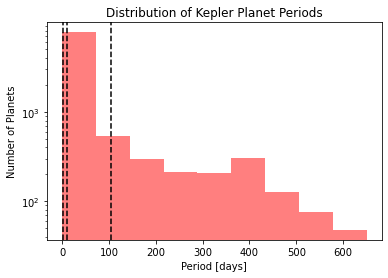

In [79]:
# Your code here
perc = np.percentile(kepler_df['koi_period'], [16, 50, 84])

plt.hist(kepler_df['koi_period'], bins=9, range=[0, 650], color='r', alpha=0.5)
# plt.vlines is a more consice way of plotting several vertical lines
plt.axvline(perc[0], ls='--', color='k')
plt.axvline(perc[1], ls='--', color='k')
plt.axvline(perc[2], ls='--', color='k')
plt.yscale('log')
plt.xlabel('Period [days]')
plt.ylabel('Number of Planets')
plt.title('Distribution of Kepler Planet Periods')
plt.show()

How about the 95th percentile? Plot that below

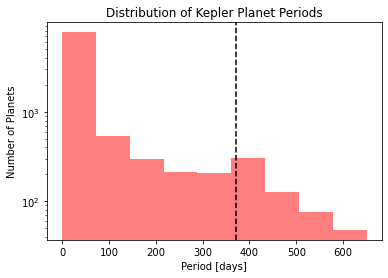

In [88]:
# Your code here
perc_95 = np.percentile(kepler_df['koi_period'], 95)

plt.hist(kepler_df['koi_period'], bins=9, range=[0, 650], color='r', alpha=0.5)
plt.axvline(perc_95, ls='--', color='k')
plt.yscale('log')
plt.xlabel('Period [days]')
plt.ylabel('Number of Planets')
plt.title('Distribution of Kepler Planet Periods')
plt.show()

We see that the distribution has some bimodality. Try to plot the same distribution, but for all confirmed Kepler exoplanets. You should be thinking about the condition we used in the "If Statements and other Conditionals" section above. We ran a **for** loop to iterate through the `kepler_df` rows, and checked **IF** the 'koi_disposition' of the row was 'CONFIRMED', i.e., if the potential exoplanet was confirmed. Instead of looping through each row, we can directly get all the confirmed exoplanet entries as follows:

In [71]:
kepler_df_conf = kepler_df[kepler_df['koi_disposition'] == 'CONFIRMED']

The above is a way to add a conditional to a pandas DataFrame. It also works with numpy (nd)arrays. Note that this is more efficient than the for loop we used above. Try to think why!

Let's plot the historgram of the periods of `kepler_df_conf`:

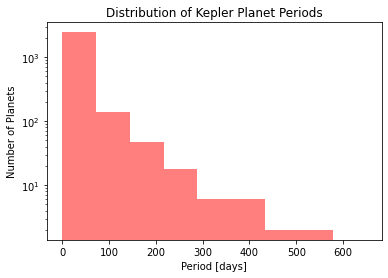

In [73]:
plt.hist(kepler_df_conf['koi_period'], bins=9, range=[0, 650], color='r', alpha=0.5)
plt.yscale('log')
plt.xlabel('Period [days]')
plt.ylabel('Number of Planets')
plt.title('Distribution of Kepler Planet Periods')
plt.show()

The bimodality is gone! This shows you why pre-processing of data is important when doing research.

Let's get a little bit fancier. I want to write a function that will compare the number of exoplanets of any number of stars, given a list of Kepler IDs. It should take in the IDs as integers, and then create a horizontal bar plot showing their respective number of exoplanets, with the IDs on the y axis. Why horizontal? Think about it — the maximum number of exoplanets of one Kepler target (star) is 7 (we calculated this above!), and the width of our computer screen is fixed, while the number of names we enter is variable, and our computer can scroll to accomodate any reasonable height. This way, our names won't get squished trying to fit everything in. 

**Step One** A function that can take in different numbers of arguments. 
Take a look at the following:

In [74]:
def a_function(arg1, arg2):
    computation = arg1 + arg2
    return computation

I can run the above and feed it two numbers:

In [75]:
a_function(1, 5)

6

And you can see it did the computation and returned it. But what if I want to add three numbers?

In [76]:
a_function(1, 5, 6)

TypeError: a_function() takes 2 positional arguments but 3 were given

What we get here is a "TypeError." It's raised because our function was specified to take exactly 2 arguments (arg1 and arg2), but we gave it three. Shoutout to python's error message actually being helpful. OK, so how do we fix this? 

Here's one way:

In [77]:
def new_func(array_like):
    out_sum = 0
    for i in array_like:
        out_sum += i
    return out_sum

What I've done is force the user to enter a list of numbers, then iterated through and added them all up. (Yes, I could've just run np.sum() on the array_like, but what's the fun in that?). But that's just a workaround — sometimes, we need the function to take a truly variable number of inputs. 

That's where **args** and **kwargs** come in. Check this out:

In [78]:
def sum_func(arg1, arg2, *args):
    out_sum = arg1 + arg2
    for i in args:
        out_sum += i 
    return out_sum

What's going on? Let's test the function a bit:

In [79]:
sum_func(1, 2)

3

In [80]:
sum_func(1, 2, 3)

6

In [82]:
sum_func(1, 2, 3, 4, 5)

15

By specifying \*args as the final input to the function, we told python "allow any extra arguments to be entered into this function, and store them in a list called args." Then, we calculated the first sum (the one that is required), and went through any extra numbers that might've been entered and added them in as well. 

There is a slightly different version of this that applies to a "dictionary" style way of doing things. See below:

In [83]:
def dict_funct(arg1, arg2, **kwargs):
    output_dict = {}
    output_dict[arg1] = arg2
    for i in kwargs.keys():
        output_dict[i] = kwargs[i]
    return output_dict

What I've done is made a function that takes 2 things, and puts them in a dictionary where the first argument is a key and the second is a value (for illustration). Watch:

In [84]:
one = dict_funct('key1', 5)
one

{'key1': 5}

In [85]:
two = dict_funct('key1', 5, key2=6)
two

{'key1': 5, 'key2': 6}

In short, \*\*kwargs tells python "allow the user to add extra variables to this function, but they have to be of the form a=b, and store those extra variables in a dictionary where each a is a key and each b is a value." 

Sometimes, args and kwargs are most useful not even because you want to use the extra optional arguments in a function, but because you want your intermediary function to allow anything to get dumped into it, and just return it and pass it all along to the next function in your program. 

OK. Back to our exoplanets. We want to compare at least a minimum of two Kepler IDs, and the ability to add in as many extra as we want. Our basic skeleton then will look something like

In [86]:
def compare_exoplanets(id1, id2, *args):
    "some code here"
    return

Now, let's practice making the bar plot. We'll be using plt.hbar(), which can take a list of strings (names) and corresponding list of values (scores), and make a bar plot (horizontal). See:

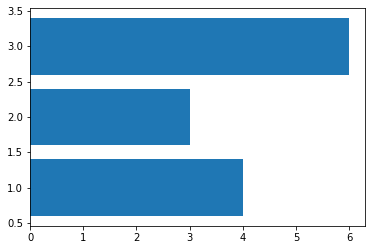

In [87]:
plt.barh([1,2,3], [4,3,6])
plt.show()

Now, we want the 1,2,3 to actually be the Kepler IDs. So I can manually set the tick labels for the plot as follows: 


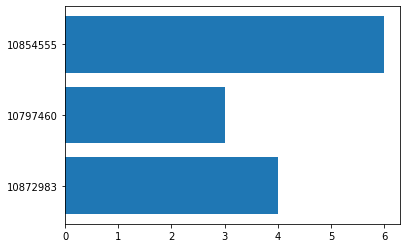

In [90]:
tick_labels = (10872983, 10797460, 10854555)
plt.barh([1,2,3], [4,3,6])
plt.yticks([1,2,3], tick_labels)
plt.show()

Cool! We're basically ready to go here. Using what I've illustrated above, make a function which takes any number of IDs in our sample as integers, and makes the plot of their respective number of exoplanets. It's up to you which way you chose to index out the number of exoplanets, but the fastest way will be using the `kepler_planets` dictionary or series we made above! Throw a title and axis labels on there while you're at it. Then test it out on first 2 IDs, then 3.

In [42]:
# Your code here
def compare_exoplanets(id1, id2, *args):
    len_plot = range(2 + len(args))
    ids = [id1] + [id2] + [i for i in args]
    planets = kepler_planets[ids]
    # Plot the bars
    plt.barh(len_plot, planets)
    plt.yticks(len_plot, ids)
    plt.xlabel('Number of exoplanets')
    plt.ylabel('Kepler ID')
    plt.show()
    return

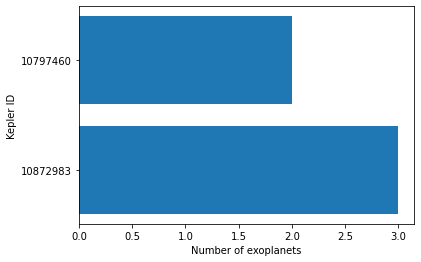

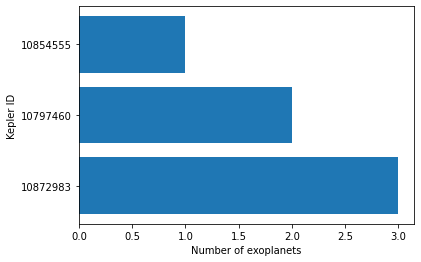

In [44]:
# Try running your function with this block, and seeing if you get the right plots.
compare_exoplanets(10872983, 10797460)
compare_exoplanets(10872983, 10797460, 10854555)

There might be some nomenclature that's a bit unfamiliar to you in the way I designed my function, if you check my solutions, though you should have been able to accomplish what was needed using for loops and things we've learned so far. But to clue you in, I utilized two basic Python behaviors to accomplish my task in fewer lines: List addition, and list comprehension. 

List addition is simply the fact that to combine two lists into one, just add them:

In [45]:
[1,2,4] + [4,5,6]

[1, 2, 4, 4, 5, 6]

Thus, if you have a list, and two separate values (the way you probably did when args is a list of IDS, but you have two IDs floating around outside, you can make a consolidated list by putting the two floating IDs into their own list and adding them to the rest. In my example, 

\[ID1\] + \[ID2\] + args

has the same effect as

\[ID1, ID2\] + args would have.

The other thing I did was a list comprehension. Watch the following:

In [46]:
empty_list = []
for i in range(10):
    empty_list.append(i*2)
empty_list

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

I used a for-loop to fill an empty list with the values of range(10) each times two. I can also use the following:

In [47]:
full_list = [i*2 for i in range(10)]
full_list

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Essentially, I compress the for-loop iteration into 1 line. Python knows I mean "create a list with values that are i\*2 for each i in range(10)". I can do this in many situations, which saves me space in my code, and is often faster computationally as well. 

**Better Function Writing** 

Let's take a few steps to make my comparison function better. The first thing we want to do is add *documentation*. This tells people how to use the function. Usually, documention looks something like this:

In [54]:
def compare_exoplanets(id1, id2, *args):
    '''
    A function to produce a horizontal bar plot comparing the
    number of exoplanets of different Kepler targets (IDs)
    INPUTS:
        id1 (int): the target Kepler ID in the kepler_planets Series
        id2 (int): the target Kepler ID in kepler_planets
        *args (optional, string): any number of Kepler IDs from kepler_planets
    PRODUCES: 
        A bar plot 
    RETURNS:
        NONE
    '''
    # Code goes here (not to spoil the above exercise!)
    return

Now, if someone is looking at our code, they can easily figure out that they need, for example, to have a dictionary or series called "kepler_planets" defined in their code for this function to work. Actually, the fact that my function requires that is bad, we'll get to that in a minute. If someone were using our code but not actually looking at the text file, they could type:

In [55]:
help(compare_exoplanets)

Help on function compare_exoplanets in module __main__:

compare_exoplanets(id1, id2, *args)
    A function to produce a horizontal bar plot comparing the
    number of exoplanets of different Kepler targets (IDs)
    INPUTS:
        id1 (int): the target Kepler ID in the kepler_planets Series
        id2 (int): the target Kepler ID in kepler_planets
        *args (optional, string): any number of Kepler IDs from kepler_planets
    PRODUCES: 
        A bar plot 
    RETURNS:
        NONE



And our documentation for it would pop up in their terminal, making it easy for them to make sure they are using it properly. 

Back to what I said about the "kepler_planets" Series. Inside my function, I index kepler_planets to get the number of exoplanets of an ID. But what if kepler_planets wasn't defined in my code? My function couldn't run. If I copied and pasted my function into another file, it wouldn't run by default. In short, it's not **general**. It's best to make your code as reasonably generalizable as possible — it will help you re-use your own code later, and catch bugs. I can make my function more generalizable by requiring the user to *provide* a kepler_planets to the function. That truly isolates it, and means I can move it from file to file or know that my tests of it aren't importing problems from elsewhere in my code. 

But what if I don't want to manually type "kepler_planets" into my code when I run it, since, at least, in this file, I only have 1 commonly defined one? Check this out:

In [67]:
def compare_exoplanets(id1, id2, kepler_planets_series=kepler_planets, *args):
    '''
    A function to produce a horizontal bar plot comparing the
    number of exoplanets of different Kepler targets (IDs)
    INPUTS:
        id1 (int): the target Kepler ID in the kepler_planets Series
        id2 (int): the target Kepler ID in kepler_planets
        *args (optional, string): any number of Kepler IDs from kepler_planets
    PRODUCES: 
        A bar plot 
    RETURNS:
        NONE
    '''
    # Code goes here!
    return

What I've done is added a new required argument to my function (I named it kepler_planets_series to avoid confusion with kepler_planets). But in the function call itself, I set the input of kepler_planets_series equal to the kepler_planets I have sitting in my code. **Note:** pre-set or "default" arguments in functions must be defined *after* all the required, undefault ones (I couldn't put `kepler_planets_series=kepler_planets` before id1 and id2. 

This is a reasonable compromise for my code — I don't have to type compare_exoplanets(id1, id2, kepler_planets, other_ids) every time — I can use my function as normal. BUT, if I move my function to another code file, it's clear that I need to manually enter a new dictionary/series, or set one named kepler_planets outside my function in my code for it to work. 

As a final edition, I'll update the documentation to include the parameters imposed on the input dictionary/series. But I'll also make it the most general (not set a default), and move kepler_planets_series to the front of the required arguments (just for the aesthetic of giving a dictionary/series, then as many IDs as you want (min 2), rather than 2 IDs, a dictionary/series, and then more IDs. 

In [2]:
def compare_students(kepler_planets_series, id1, id2, *args):
    '''
    A function to produce a horizontal bar plot comparing the
    number of exoplanets of different Kepler targets (IDs)
    INPUTS:
        kepler_planets_series (dict): A dictionary containing Kepler IDs and number of
                                      planets of the form {id (int): planets (int)}
        id1 (int): the target Kepler ID in the kepler_planets Series
        id2 (int): the target Kepler ID in kepler_planets
        *args (optional, string): any number of Kepler IDs from kepler_planets
    PRODUCES: 
        A bar plot 
    RETURNS: 
        NONE
    '''
    # Code here
    return

**ON YOUR OWN**

Here's a couple of exercises to play around with this function to make it EVEN MORE general, which you should be able to do with some quick googling. 

1. What if someone enters an ID in your function that isn't in the dictionary (not in Kepler or misspelled). As of now, your function will stop and throw a "key error", and say that the ID is not in the dictionary. For the sake of exercise, let's change that behavior, and ignore it if an ID isn't included moving on to all the other IDs and still producing the plot. Update your function such that if an ID isn't in the dictionary, it prints a warning "Warning, ___ wasn't in the kepler_planets dict, continuing..." so the user knows, but then still plots the rest of the (working) IDs. You could do this with an if-statement before actually querying the dict, or if you're adventurous, look up "try and except statements" online. 
2. Look around plt.barh's documentation, and see if you can plot the ID with the highest number of planets in a different color than the rest. Note, the easiest way might be to go through once plotting all in one color, and plotting the new color for the top score bar on top of it.
3. Try to create a new dictionary (or series) kepler_planet_periods of the form {'kepler_name' (str): koi_period (float)}. I want you to get comfortable with using strings as dictionary keys. Then, write a function compare_periods where you compare the periods of different Kepler planet names. Note that the string matching from function argument to dictionary key is exact — the user can't enter 'malena' if the key was 'Malena'. The best way around this might be to coerce all the strings to be all lower or upper case in the dictionary, and then coerce the user input to the function to be the same case (upper or lower) before attempting to query the dictionary. Look up how to make strings upper or lower case, and implement that in your function. 


Alright! That's it for this tutorial. As always, I hope it was helpful to you. If you have any questions about it (or find typos), or a question about your own code as you're getting started, feel free to email me!

For more information on functions, refer to the new [Functional Programming](https://prappleizer.github.io/Tutorials/FunctionalProgramming/FunctionalProgramming_web.html) chapter of the [textbook](https://prappleizer.github.io/index.html) we are using. This chapter is also available as a pdf in the pasea-arp/Day_1 folder.
